<a href="https://colab.research.google.com/github/albina77/6115-preparation-for-the-credit-Python-3-semester/blob/master/spark_%D1%87%D0%B0%D1%81%D1%82%D1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Apache Spark

## Cегодня будем обсуждать:

+ Основные недостатки MapReduce
+ Место Spark в экосистеме больших данных и его общая архитектура
+ Область применения
+ Устройство Spark Dataframe API
+ Чтение данных из источника
+ Работа с данными
  - Базовый SQL
  - NA функции
  - Группировки
  - Запись данных
  - Соединения
  - Оконные функции
  - Функции pyspark.sql.functions

## Основные недостатки классического MapReduce

- Быстроумирающие контейнеры
- Прямая зависимость эффективности MapReduce от количества машин из-за высоких издержек на взаимодействие между ними
- Отсутствие возможности прогнозировать время окончания этапа Map
- Постоянное взаимодействие с внешним хранилищем на этапе чтение/запись между этапами Map и Reduce
- MapReduce API сложное и разработчику требуется писать каждый этап обработки самостоятельно
- Низкая утилизапция железа на кластере из-за деления ресурсов под map и reduce этапы в памяти
- Ограниченное число источников/приемников данных из коробки
- MapReduce - это только вычислительный фреймворк

## Общая информация про Spark

**Apache Spark** - это:
+ Фреймворк с открытым исходным кодом, который позволяет строить распределенные приложения для обработки больших данных
+ Эволюция MapReduce(Hadoop)
+ Есть API на Scala, Java, Python и R
+ Самый популярный проект в области обработки больших данных


## Спарк состоит из следующих компонентов:

- **Ядро (Core);**
- **SQL** – инструмент для аналитической обработки данных с помощью SQL-запросов;
- **Streaming** – надстройка для обработки потоковых данных;
- **MLlib** – набор библиотек машинного обучения;
- **GraphX** – модуль распределённой обработки графов.

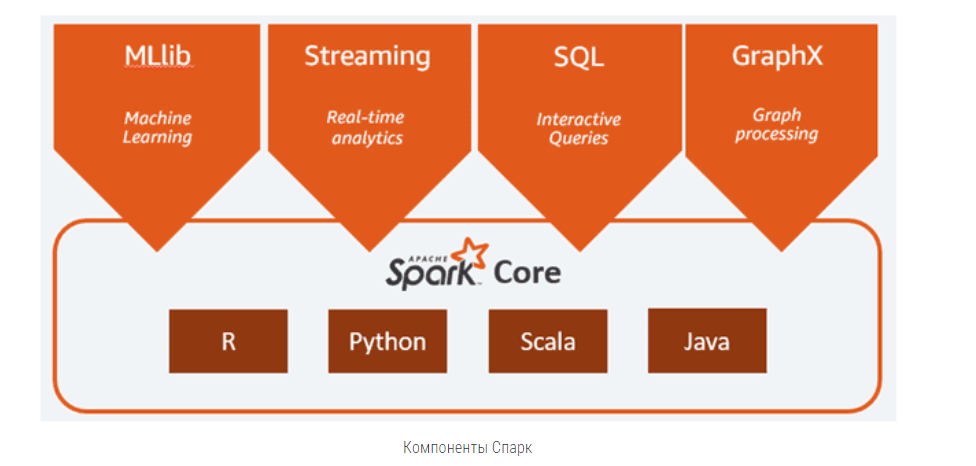

## Архитектура Spark

+ **Driver** `(Master)`:
  - предоставляет API через SparkSession и SparkContext
  - выполняет ваш код - python файл или скомпилированный .jar
  - контролирует выполнение задачи

+ **Workers** `(Executors/Slaves)`:
  - обрабатывают данные
  - каждый Worker работает со своим сегментом данных - **Partition**
  - не выполняются ваш код напрямую
  - получают задачи от Driver
+ **Cluster Manager** `(YARN/Mesos)`:
  - отвечает за аллокацию контейнеров, выполняющих код драйвера и воркеров, на кластере
  - квотирует ресурсы между пользователями
  - контролирует состояние контейнеров

<img style="float: left;" src="https://spark.apache.org/docs/latest/img/cluster-overview.png">

## Структура джобы Spark

+ Spark **«ничего не делает»** до тех пор, пока драйверная программа не вызовет действие
+ При каждом вызове действия планировщик Spark строит DAG выполнения и запускает задание Spark (Spark job)
+ Джоба Spark состоит из этапов, представляющих собой шаги преобразования данных, необходимые для формирования итогового набора RDD.
+ Этап состоит из набора tasks, каждая из которых означает параллельное вычисление, выполняемое на исполнителе.

Под капотом Apache Spark лежит **понятие абстракции данных как распределенного набора объектов**.
- **RDD** – это распределенная коллекция данных, размещенных на узлах кластера, набор объектов Java или Scala, представляющих данные.
- **DataFrame** – это распределенная коллекция данных, организованная в именованные столбцы. Концептуально он соответствует таблице в реляционной базе данных с улучшенной оптимизаций для распределенных вычислений. DataFrame доступен в языках программирования Scala, Java, Python и R.
- **DataSet** – это расширение API DataFrame, добавленный в Spark 1.6. Он обеспечивает функциональность объектно-ориентированного RDD-API (строгая типизация, лямбда-функции), производительность оптимизатора запросов Catalyst и механизм хранения вне кучи API DataFrame [3]. Dataset может быть построен из JVM-объектов и изменен с помощью функциональных преобразований (map, flatMap, filter и т. д.). Dataset API доступен в Scala и Java, не поддерживается R и Python в версии Spark 2.1.1

## Сравнение RDD API и DataFrame API

### Типы данных
**`RDD`**: низкоуревная распределенная коллекция данных любого типа  
**`DF`**: таблица со схемой, состоящей из колонок разных типов, описанных в `org.apache.spark.sql.types`  

### Обработка данных
**`RDD`**: сериализуемые функции  
**`DF`**: кодогенерация SQL > Java код  

### Функции и алгоритмы
**`RDD`**: нет ограничений  
**`DF`**: ограничен SQL операторами, функциями `org.apache.spark.sql.functions` и пользовательскими функциями  

### Источники данных
**`RDD`**: каждый источник имеет свое API  
**`DF`**: единое API для всех источников

### Производительность
**`RDD`**: напрямую зависит от качества кода   
**`DF`**: встроенные механизмы оптимизации SQL запроса   

### Потоковая обработка данных
**`RDD`**: устаревший DStreams   
**`DF`**: активно развивающийся Structured Streaming   

## Dataframe API

**Dataframe:**
+ структурированная колоночная структура данных
+ может быть создана на основе:
  - локальной коллекции
  - файла (файлов)
  - базы данных
+ в python работает значительно быстрее, чем RDD
+ под капотом использует RDD
+ позволяет выполнять произвольные SQL операции с данными
+ аналогично RDD являются ленивыми и неизменяеыми

## Из чего состоит Dataframe
+ схема [pyspsark.sql.StructType](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.StructType)
+ колонки [pyspark.sql.Column](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Column)
+ данные [pyspark.sql.Row](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Row)

## Сценарии использования

- **RDD** целесообразно использовать в следующих кейсах:

    - требуется выполнить низкоуровневые преобразования и действия, контролируя набор данных;
    - данные неструктурированы, например, потоки медиаинформации или текста;
    - объем данных не слишком велик и не требуется строго типизированный код;
    - необходимо манипулировать данными с помощью функциональных программных конструкций, а не выражений, специфичных для предметной области, т.е. предполагается использовать функциональный стиль программирования, а не доменно-ориентированную разработку.
    - необходимо работать с языками программирования Python и R;
    - есть возможность отказаться от некоторых преимуществ оптимизации и производительности, доступных в DataFrame и Dataset для структурированных и полуструктурированных данных.
    
    

- **DataSet и DataFrame** рационально использовать в следующих кейсах:

    - необходима высокая скорость обработки данных;
    - нужна богатая семантика, высокоуровневые абстракции и специфичные для домена API;
    - обработка требует высокоуровневых выражений, фильтров, map-операций, агрегации, средних значений, суммы, SQL-запросов, столбцового доступа и использования лямбда-функций для полуструктурированных данных;
    - используется схема данных или столбцовые форматы (Parquet, ORC), где обработка или доступ к нужным атрибутам выполняется по имени или столбцу;
    - нужна быстрая и избирательная работа с некоторыми атрибутами, например, счетчиками, ассоциативными массивами;
    - необходимо унифицировать и упростить API-интерфейсы в библиотеках Apache

### Операции
1. Трансформации
2. Действия

**Трансформации** (Transormations):
- всегда превращают один RDD/Dataframe в новый RDD/Dataframe
- всегда являются ленивыми - создают граф вычислений, но не запускают их
- иногда (часто) неявно требуют перемешивания данных между воркерами - **Shuffle**

Чаще встречаются следующие трансформации:
- select(), withColumn() — создание проекций столбцов;
- filter() – фильтрация;
- orderBy(), sort(), sortWithinPartitions() – сортировка;
- Different(), dropDuplicates() – удаление дублей (дедупликация), о чем мы писали здесь;
- join() — для операций соединения, про которые мы рассказывали в этой статье;
- groupBy() – агрегация, которая относится к shuffle-операциям, что мы разбирали в этом материале.


**Действия** (Actions):
- выполняют действие над RDD/Dataframe
- запускают вычисления

Чаще встречаются следующие действия:
- count() — вычисляет количество строк в DataFrame;
- show() — выводит на экран 20 записей из DataFrame;
- collect() — выводит все записи на экран, собирая все данные от всех исполнителей и передавая их драйверу;
- toPandas() — аналог collect(), но результатом является не список записей, а датафрейм Pandas;
- take(n) — тоже аналог collect(), который собирает не все записи, а n. Пригодится при проверке наличия данных в отдельном датафрейме или он пуст, например, take (1).
- write — создает записывающий обработчик DataFrame, который позволяет сохранять данные во внешнем хранилище.

  ## Ленивые вычисления:
  - **Spark вычисляет запросы отложенным образом**, рассчитывая результат преобразований набора только в момент, когда становятся необходимы итоговые данные
  - **Spark умеет хранить данные в оперативной памяти** Worker-ов во время всего времени жизни приложения Spark ради ускорения доступа при повторяемых вычислениях




**`Отложенные вычисления`** + **`хранения данных в оперативной памяти`** + **`неизменяемость объектов`** == **`эффективность`** + **`отказоустойчивость`** + **`масштабируемость`**

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=1771aa2974a6de3fb73e69d8961a96fab1cf09fc04fa2056f64dedf9a43991e8
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
pip install findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
import pyspark
from pyspark.context import SparkContext, SparkConf
from pyspark.sql.session import SparkSession
spark = (
    SparkSession
    .builder
    .appName('BIT_01')
    .config('spark.ui.port', '9311')
    .config('spark.executor.memoryOverhead', '1G')
    .config('spark.shuffle.service.enabled', 'true')
    .config('spark.dynamicAllocation.enabled', 'true')
    .config('spark.driver.extraClassPath', '/opt/spark/jars/sqljdbc42.jar')\
    .config('spark.executor.extraClassPath', '/opt/spark/jars/sqljdbc42.jar')\
    .getOrCreate()
)

In [ ]:
spark

In [ ]:
df = spark.read.option("header",True).csv("superstore_final_dataset.csv")

In [ ]:
# посмотреть схему датафрейма (колонки и их типы)
# cхема может быть сложной, колонка может иметь массив и количество вложенности никак не лимитировано
df.printSchema()

root
 |-- Row_ID: string (nullable = true)
 |-- Order_ID: string (nullable = true)
 |-- Order_Date: string (nullable = true)
 |-- Ship_Date: string (nullable = true)
 |-- Ship_Mode: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Customer_Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal_Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub_Category: string (nullable = true)
 |-- Product_Name: string (nullable = true)
 |-- Sales: string (nullable = true)



In [ ]:
# select - выбрать несколько столбцов для вывода в консоль драйвера
df.select("Product_ID", "Category").show(10, False)

# Когда вы выбираете несколько столбцов из исходного датафрейма, вы не мутируете их, а создаете новый в памяти
# DF и RDD неизменяемые типы данных
df.show(5,False)

+---------------+---------------+
|Product_ID     |Category       |
+---------------+---------------+
|FUR-BO-10001798|Furniture      |
|FUR-CH-10000454|Furniture      |
|OFF-LA-10000240|Office Supplies|
|FUR-TA-10000577|Furniture      |
|OFF-ST-10000760|Office Supplies|
|FUR-FU-10001487|Furniture      |
|OFF-AR-10002833|Office Supplies|
|TEC-PH-10002275|Technology     |
|OFF-BI-10003910|Office Supplies|
|OFF-AP-10002892|Office Supplies|
+---------------+---------------+
only showing top 10 rows

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+-----------------------------------------------------------+--------+
|Row_ID|Order_ID      |Order_Date|Ship_Date |Ship_Mode     |Customer_ID|Customer_Name  |Segment  |Country      |City           |State     |Postal_Code|Region|Product_ID     |Category       |Sub_Category|Product_Name          

In [ ]:
# write - запись в файл
df.write.csv('test', mode="overwrite")

In [ ]:
df.write.parquet('test2', mode="overwrite")

## Чтение данных из источника
Основной метод чтения любых источников

```df = spark.read.format(datasource_type).option(datasource_options).load(object_name)```

+ ```datasource_type``` - тип источника ("parquet", "json", "cassandra") и т. д.
+ ```datasource_options``` - опции для работы с источником (логины, пароли, адреса для подключения и т. д.)
+ ```object_name``` - имя таблицы/файла/топика/индекса

[DataframeReader](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader):
+ по умолчанию выводит схему данных
+ является трансформацией (ленивый)
+ возвращает [Dataframe](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame)

### Список (неполный) поддерживаемых источников данных
+ Файлы:
  - json
  - text
  - csv
  - orc
  - parquet
  - delta
+ Базы данных
  - elasticsearch
  - cassandra
  - jdbc
  - hive
  - redis
  - mongo
+ Брокеры сообщений
  - kafka
  

## Работа с данными

In [ ]:
# Удаляем дубликаты с помощью метода distinct(), который возвращает новый df, а не мутирует текущий
# Удаляет все колонки, где значения одинаковые во всех столбцах одинаковые
df.distinct().show()

+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|    Customer_Name|    Segment|      Country|         City|       State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|  Sales|
+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|   468|US-2016-101399|17/01/2016|24/01/2016|Standard Class|   JS-15940|  Joni Sundaresam|Home Office|United States|   Park Ridge|    Illinois|      60068|Central|FUR-FU-10002918|      Furniture| Furnishings|Eldon ClusterMat ...|254.744|
|  1172|US-2015-100279| 10/3/2015|14/03/2015|Sta

In [ ]:
# есть более удобный вариант, где можно указать, по каким колонкам будет проводить удаление дубликатов
# уникальность будет определяться по кортежу из subset
df.dropDuplicates(subset=["Category", "Sub_Category"]).show()
df.dropDuplicates(subset=["Sub_Category"]).show()

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|  Customer_Name|  Segment|      Country|           City|         State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|   Sales|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+--------------+-----------+-------+---------------+---------------+------------+--------------------+--------+
|     1|CA-2017-152156| 8/11/2017|11/11/2017|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|      Kentucky|      42420|  South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset Col...|  261.96|
|     2|CA-2017-152156| 8/11/2017|11/11/2017

In [ ]:
# Удаляем пустые строки. Параметр "all" означает, что будут удалены только те строки, в которых ВСЕ элементы null
# Пакет na - разные методы на пропусками в данных

# .na.drop("all") - удаляем строки, где во всех столбцах значение Null
# если в na передать аргумент any, удалим строки, где встречаются хотя бы раз Null

df \
    .distinct() \
    .na.drop("all") \
    .show(10)

+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+----------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|    Customer_Name|    Segment|      Country|         City|     State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|  Sales|
+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+----------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|   468|US-2016-101399|17/01/2016|24/01/2016|Standard Class|   JS-15940|  Joni Sundaresam|Home Office|United States|   Park Ridge|  Illinois|      60068|Central|FUR-FU-10002918|      Furniture| Furnishings|Eldon ClusterMat ...|254.744|
|  1172|US-2015-100279| 10/3/2015|14/03/2015|Standard Cl

In [ ]:
# Заполняем пустые значения, потому что 1 + 0 = 1, а 1 + NULL = NULL
# Передаем в na.fill python словарь, в котором указываются значения, которые следует использовать для null

# Null = Null  - false
# Null != Null - false
# is Null / is not Null


df \
    .distinct() \
    .na.drop("all") \
    .na.fill({'Postal_Code': '99999', 'Sales': 0}) \
    .show()

+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|Row_ID|      Order_ID|Order_Date| Ship_Date|     Ship_Mode|Customer_ID|    Customer_Name|    Segment|      Country|         City|       State|Postal_Code| Region|     Product_ID|       Category|Sub_Category|        Product_Name|  Sales|
+------+--------------+----------+----------+--------------+-----------+-----------------+-----------+-------------+-------------+------------+-----------+-------+---------------+---------------+------------+--------------------+-------+
|   468|US-2016-101399|17/01/2016|24/01/2016|Standard Class|   JS-15940|  Joni Sundaresam|Home Office|United States|   Park Ridge|    Illinois|      60068|Central|FUR-FU-10002918|      Furniture| Furnishings|Eldon ClusterMat ...|254.744|
|  1172|US-2015-100279| 10/3/2015|14/03/2015|Sta

In [ ]:
# Пример выборки нескольких колонок

clean_data = df \
    .distinct() \
    .na.drop("all") \
    .na.fill({'Postal_Code': '99999', 'Sales': 0}) \
    .select('Postal_Code', 'Sales')

clean_data.select('postal_code').show()

+-----------+-------+
|Postal_Code|  Sales|
+-----------+-------+
|      60068|254.744|
|      48073|  22.38|
|      91761| 283.92|
|      94122| 19.752|
|      37918|  4.704|
|      60505| 60.288|
|      60076| 12.224|
|      45503| 60.864|
|      98103| 42.624|
|      77041| 33.792|
|      46060| 135.72|
|      19140| 70.448|
|      75081| 44.784|
|      94109|  99.98|
|       6010|   3.81|
|      60653|  6.912|
|      45503| 22.248|
|      97301|  52.68|
|      80219| 15.488|
|      36608|  59.97|
+-----------+-------+
only showing top 20 rows



In [ ]:
clean_data.select('postal_code').show()

+-----------+
|postal_code|
+-----------+
|      60068|
|      48073|
|      91761|
|      94122|
|      37918|
|      60505|
|      60076|
|      45503|
|      98103|
|      77041|
|      46060|
|      19140|
|      75081|
|      94109|
|       6010|
|      60653|
|      45503|
|      97301|
|      80219|
|      36608|
+-----------+
only showing top 20 rows



In [ ]:
df.show(10, 0)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+----------------------------------------------------------------+--------+
|Row_ID|Order_ID      |Order_Date|Ship_Date |Ship_Mode     |Customer_ID|Customer_Name  |Segment  |Country      |City           |State     |Postal_Code|Region|Product_ID     |Category       |Sub_Category|Product_Name                                                    |Sales   |
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+----------------------------------------------------------------+--------+
|1     |CA-2017-152156|8/11/2017 |11/11/2017|Second Class  |CG-12520   |Claire Gute    |Consumer |United States|Henderson      |Kentucky  |42420      |South |FUR-BO-1

In [ ]:
# Строим базовую группировку

df.groupBy('Category').count().show(20, False)

+---------------+-----+
|Category       |count|
+---------------+-----+
|Office Supplies|5909 |
|Furniture      |2078 |
|Technology     |1813 |
+---------------+-----+



In [ ]:
# Метод count можно спрятать внутри agg()
from pyspark.sql.functions import count, col

agg = df.groupBy('Category').agg(count("*"))

In [ ]:
agg.show()

+---------------+--------+
|       Category|count(1)|
+---------------+--------+
|Office Supplies|    5909|
|      Furniture|    2078|
|     Technology|    1813|
+---------------+--------+



In [ ]:
# Чтобы колонки имели правильное имя, следует использовать метод alias()

agg = df.groupBy('Category', 'Sub_Category').agg(count("*").alias("count_sub_category"))
agg.show()

+---------------+------------+------------------+
|       Category|Sub_Category|count_sub_category|
+---------------+------------+------------------+
|Office Supplies|  Appliances|               459|
|Office Supplies|   Envelopes|               248|
|      Furniture|      Chairs|               607|
|Office Supplies|     Storage|               832|
|Office Supplies|       Paper|              1338|
|Office Supplies|    Supplies|               184|
|     Technology|     Copiers|                66|
|Office Supplies|         Art|               785|
|Office Supplies|     Binders|              1492|
|     Technology| Accessories|               756|
|Office Supplies|   Fasteners|               214|
|      Furniture|   Bookcases|               226|
|     Technology|      Phones|               876|
|Office Supplies|      Labels|               357|
|     Technology|    Machines|               115|
|      Furniture|      Tables|               314|
|      Furniture| Furnishings|               931|


In [ ]:
# Добавим в группировку сумму населения на каждом континенте

from pyspark.sql.functions import count, sum

agg =  df.groupBy('Category', 'Sub_Category')\
         .agg(count("*").alias("category_count"), sum('Sales').alias("Sales_sum"))

agg.show()

+---------------+------------+--------------+------------------+
|       Category|Sub_Category|category_count|         Sales_sum|
+---------------+------------+--------------+------------------+
|Office Supplies|  Appliances|           459|104618.40299999998|
|Office Supplies|   Envelopes|           248|16128.045999999997|
|      Furniture|      Chairs|           607| 322822.7310000008|
|Office Supplies|     Storage|           832| 219343.3920000001|
|Office Supplies|       Paper|          1338| 76828.30400000002|
|Office Supplies|    Supplies|           184| 46420.30800000001|
|     Technology|     Copiers|            66|146248.09399999995|
|Office Supplies|         Art|           785|26705.409999999956|
|Office Supplies|     Binders|          1492|200028.78500000003|
|     Technology| Accessories|           756|164186.70000000016|
|Office Supplies|   Fasteners|           214|3001.9599999999996|
|      Furniture|   Bookcases|           226|113813.19869999998|
|     Technology|      Ph

## Запись данных
Основной метод записи в любые системы

```df.write.format(datasource_type).options(datasource_options).mode(savemode).save(object_name)```

+ ```datasource_type``` - тип источника ("parquet", "json", "cassandra") и т. д.
+ ```datasource_options``` - опции для работы с источником (логины, пароли, адреса для подключения и т. д.)
+ ```savemode``` - режим записи данных (добавление, перезапись и т. д.)
+ ```object_name``` - имя таблицы/файла/топика/индекса

[DataFrameWriter](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameWriter):
+ метод ```save``` является действием
+ позволяет работать с партиционированными данными (parquet, orc)
+ не всегда валидирует схему и формат данных


### Список (неполный) поддерживаемых источников данных
+ Файлы:
  - json
  - text
  - csv
  - orc
  - parquet
  - delta
+ Базы данных
  - elasticsearch
  - cassandra
  - jdbc
  - hive
  - redis
  - mongo
+ Брокеры сообщений
  - kafka
  


In [ ]:
agg.show()

+---------------+------------+--------------+------------------+
|       Category|Sub_Category|category_count|         Sales_sum|
+---------------+------------+--------------+------------------+
|Office Supplies|  Appliances|           459|104618.40299999998|
|Office Supplies|   Envelopes|           248|16128.045999999997|
|      Furniture|      Chairs|           607| 322822.7310000008|
|Office Supplies|     Storage|           832| 219343.3920000001|
|Office Supplies|       Paper|          1338| 76828.30400000002|
|Office Supplies|    Supplies|           184| 46420.30800000001|
|     Technology|     Copiers|            66|146248.09399999995|
|Office Supplies|         Art|           785|26705.409999999956|
|Office Supplies|     Binders|          1492|200028.78500000003|
|     Technology| Accessories|           756|164186.70000000016|
|Office Supplies|   Fasteners|           214|3001.9599999999996|
|      Furniture|   Bookcases|           226|113813.19869999998|
|     Technology|      Ph

In [ ]:
# Сохраним данные в parquet, предварительно отфильтровав данные
agg \
    .filter(col('Category') == 'Technology') \
    .write\
    .parquet('test3', mode="overwrite")

In [ ]:
# Если мы хотим использовать другое количество партиции, указываем его через repartition
# Сохраним данные в parquet, предварительно отфильтровав данные
agg \
    .filter(col('Category') == 'Technology') \
    .repartition(1)\
    .write\
    .parquet('test3', mode="overwrite")

In [ ]:
# указание колонки, по которой требуется проводить партицирование указывается через .partitionBy()
agg \
    .filter(col('Category') == 'Technology') \
    .write\
    .partitionBy("Sub_Category") \
    .parquet('test3', mode="overwrite")

## Соединения

Join'ы позволяют соединять два DF в один по заданным условиям.

По типу условия join'ы делятся на:
+ equ-join - соединение по равенству одного или более ключей
+ non-equ join - соединение по условию, отличному от равенства одного или более ключей

При выполнении join Spark автоматически выбирает один [из доступных алгоритмов](https://youtu.be/fp53QhSfQcI) соединения и не всегда делает это оптимально, часто применяя cross join. Поэтому, в последних версиях Spark метод ```join()``` приведет к ошибке, если под капотом он будет использовать cross join. Отключить эту проверку можно с помощью опции ```--conf spark.sql.crossJoin.enabled=true```

In [ ]:
# inner join

# outer join:
    # left join
    # right join
    # full join

# cross join


In [ ]:
customer = spark.read.option("header",True).option('sep',';').csv("customer.csv")

In [ ]:
customer.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- job_industry_category: string (nullable = true)
 |-- wealth_segment: string (nullable = true)
 |-- deceased_indicator: string (nullable = true)
 |-- owns_car: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- property_valuation: string (nullable = true)



In [ ]:
transaction = spark.read.option("header",True).option('sep',';').csv("transaction.csv")

In [ ]:
transaction.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- product_line: string (nullable = true)
 |-- product_class: string (nullable = true)
 |-- product_size: string (nullable = true)
 |-- list_price: string (nullable = true)
 |-- standard_cost: string (nullable = true)



In [ ]:
# Самый простой join - inner join по равенству одной колонки
joined = transaction.join(customer, 'customer_id', 'inner')

joined.printSchema()
joined.show(5)

root
 |-- customer_id: string (nullable = true)
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- product_line: string (nullable = true)
 |-- product_class: string (nullable = true)
 |-- product_size: string (nullable = true)
 |-- list_price: string (nullable = true)
 |-- standard_cost: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- job_industry_category: string (nullable = true)
 |-- wealth_segment: string (nullable = true)
 |-- deceased_indicator: string (nullable = true)
 |-- owns_car: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- s

In [ ]:
joined.count()

19997

In [ ]:
# Inner join по равенству двух колонок. Поскольку двух одинаковых колонок у нас нет, мы создадим их из константы
from pyspark.sql.functions import lit

left = customer.withColumn("x", lit("x"))
right = transaction.withColumn("x", lit("x"))

joined = left.join(right, ['customer_id', 'x'], 'inner')

joined.printSchema()
joined.show(5)

root
 |-- customer_id: string (nullable = true)
 |-- x: string (nullable = false)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- job_industry_category: string (nullable = true)
 |-- wealth_segment: string (nullable = true)
 |-- deceased_indicator: string (nullable = true)
 |-- owns_car: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- property_valuation: string (nullable = true)
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- product_line: string (nullable = true)
 |-- product_class: st

In [ ]:
# Inner join по равенству двух колонок. Поскольку двух одинаковых колонок у нас нет, мы создадим их из константы
from pyspark.sql.functions import lit

left = customer.withColumn("x", lit("x"))
right = transaction.withColumn("x", lit("x"))

joined = left.join(right, (left.customer_id == right.customer_id) & (left.DOB>='1999-01-01'), 'inner')

joined.printSchema()
joined.show(5)

root
 |-- customer_id: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- job_industry_category: string (nullable = true)
 |-- wealth_segment: string (nullable = true)
 |-- deceased_indicator: string (nullable = true)
 |-- owns_car: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- property_valuation: string (nullable = true)
 |-- x: string (nullable = true)
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- product_line: strin

In [ ]:
joined.count()

20000

In [ ]:
customer.count()

4000

In [ ]:
# Один из самых простов вариантов ускорить работу join - сделать broadcast.
# При этом DF будет целиком склонирован на каждый воркер, что минимизирует shuffle во время выполнения join'а

# BroadCast() - cамый быстрый вид join в спарке. Строит хэш таблицу и кладет на каждый
# воркер копию для увеличения скорости работы джойна.

# Это позволяет очень быстро проверять условие соединения join

from pyspark.sql.functions import broadcast

joined = transaction.join(broadcast(customer), 'customer_id', 'inner')

joined.printSchema()
joined.show(5)

root
 |-- customer_id: string (nullable = true)
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- product_line: string (nullable = true)
 |-- product_class: string (nullable = true)
 |-- product_size: string (nullable = true)
 |-- list_price: string (nullable = true)
 |-- standard_cost: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- job_industry_category: string (nullable = true)
 |-- wealth_segment: string (nullable = true)
 |-- deceased_indicator: string (nullable = true)
 |-- owns_car: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- s

## Оконные функции

Оконные функции позволяют делать функции над "окнами" (кто бы мог подумать) данных

Окно создается из класса [pyspark.sql.Window](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Window) с указанием полей, определяющих границы окон и полей, определяющих порядок сортировки внутри окна:

```window = Window.partitionBy("a", "b").orderBy("a")```

Применяя окна, можно использовать такие полезные функции из [pyspark.sql.functions](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.functions), как ```lag()``` и ```lead()```, а также эффективно работать с данными time-series, вычисляя такие параметры, как, например, среднее значение заданного поля за 3-х часовой интервал

In [ ]:
customer.show(5)

+-----------+--------------+---------+------+----------+--------------------+---------------------+-----------------+------------------+--------+-------------------+--------+---------------+---------+------------------+
|customer_id|    first_name|last_name|gender|       DOB|           job_title|job_industry_category|   wealth_segment|deceased_indicator|owns_car|            address|postcode|          state|  country|property_valuation|
+-----------+--------------+---------+------+----------+--------------------+---------------------+-----------------+------------------+--------+-------------------+--------+---------------+---------+------------------+
|          1|       Laraine|Medendorp|     F|1953-10-12| Executive Secretary|               Health|    Mass Customer|                 N|     Yes| 060 Morning Avenue|    2016|New South Wales|Australia|                10|
|          2|           Eli|  Bockman|  Male|1980-12-16|Administrative Of...|   Financial Services|    Mass Customer|   

In [ ]:
transaction.show(5)

+--------------+----------+-----------+----------------+------------+------------+--------------+------------+-------------+------------+----------+-------------+
|transaction_id|product_id|customer_id|transaction_date|online_order|order_status|         brand|product_line|product_class|product_size|list_price|standard_cost|
+--------------+----------+-----------+----------------+------------+------------+--------------+------------+-------------+------------+----------+-------------+
|             1|         2|       2950|      25.02.2017|       False|    Approved|         Solex|    Standard|       medium|      medium|     71,49|        53,62|
|             2|         3|       3120|      21.05.2017|        True|    Approved| Trek Bicycles|    Standard|       medium|       large|   2091,47|       388,92|
|             3|        37|        402|      16.10.2017|       False|    Approved|    OHM Cycles|    Standard|          low|      medium|   1793,43|       248,82|
|             4|      

In [ ]:
# В нашем случае, используя оконные функции, мы можем построить DF из предыдущих примеров c join,
# но без использования соединения
#
from pyspark.sql import Window
import pyspark.sql.functions as F

window = Window.partitionBy("customer_id")

agg = transaction \
    .withColumn("customer_count",    F.count("*").over(window)) \
    .withColumn("standard_cost_sum", F.sum(F.regexp_replace('standard_cost', ',', '.').cast('float')).over(window))

agg.show()

+--------------+----------+-----------+----------------+------------+------------+--------------+------------+-------------+------------+----------+-------------+--------------+------------------+
|transaction_id|product_id|customer_id|transaction_date|online_order|order_status|         brand|product_line|product_class|product_size|list_price|standard_cost|customer_count| standard_cost_sum|
+--------------+----------+-----------+----------------+------------+------------+--------------+------------+-------------+------------+----------+-------------+--------------+------------------+
|            94|        86|          1|      23.12.2017|       False|    Approved|    OHM Cycles|    Standard|       medium|      medium|    235,63|       125,07|            11| 6066.360103607178|
|          3765|        38|          1|      06.04.2017|        True|    Approved|         Solex|    Standard|       medium|      medium|   1577,53|       826,51|            11| 6066.360103607178|
|          5157

In [ ]:
# Работать чисто с SQL через Spark

spark.sql("""select 1 as cnt""").show()

+---+
|cnt|
+---+
|  1|
+---+



## Выводы
**Dataframe API**:
+ мощный инструмент для работы с данными
+ в отличие от RDD, Dataframe API устроен так, что все вычисления происходят в JVM
+ обладает единым API для работы с различными источниками данных
+ имеет большой набор встроенных функций работы с данными

## Spark Catalyst
Основной модуль, отвечающий за разбор SQL, и оптимизацию плана выполнения запроса — Spark Catalyst.

Расширенный вывод при описании плана запроса ```df.explain(true)``` позволяет отследить все стадии, которые проходит запрос:

**```Parsed Logical Plan```** - получаем после синтаксического разбора SQL. На этом этапе проверяется только синтаксическая корректность запроса.

**```Analyzed Logical Plan```** - на этом этапе добавляется информация о структуре используемых сущностей, проверяется соответствие структуры и запрашиваемых атрибутов.

**```Optimized Logical Plan```** - самое интересное для нас. На данном этапе происходит преобразование получившегося дерева запроса на основании доступных правил оптимизации.

**```Physical Plan```** — начинают учитываться особенности доступа к исходным данным, включая оптимизации по фильтрации партиций и данных для минимизации получаемого набора данных. Выбирается стратегия выполнения join

In [ ]:
# план запроса
# extended - покажи мне все, что есть в плане запроса
agg.explain(extended=True)

== Parsed Logical Plan ==
'Project [transaction_id#3367, product_id#3368, customer_id#3369, transaction_date#3370, online_order#3371, order_status#3372, brand#3373, product_line#3374, product_class#3375, product_size#3376, list_price#3377, standard_cost#3378, customer_count#6576L, sum(cast(regexp_replace('standard_cost, ,, ., 1) as float)) windowspecdefinition('customer_id, unspecifiedframe$()) AS standard_cost_sum#6591]
+- Project [transaction_id#3367, product_id#3368, customer_id#3369, transaction_date#3370, online_order#3371, order_status#3372, brand#3373, product_line#3374, product_class#3375, product_size#3376, list_price#3377, standard_cost#3378, customer_count#6576L]
   +- Project [transaction_id#3367, product_id#3368, customer_id#3369, transaction_date#3370, online_order#3371, order_status#3372, brand#3373, product_line#3374, product_class#3375, product_size#3376, list_price#3377, standard_cost#3378, customer_count#6576L, customer_count#6576L]
      +- Window [count(1) windowsp